In [1]:
from skimage import io
from code import interact

from matplotlib.pyplot import figure, subplot
from skimage import data as img
from skimage import filters
from matplotlib import pyplot as plt
from skimage.measure import label, regionprops
from skimage.morphology import closing
from skimage.segmentation import clear_border
import skimage.morphology as mp
import numpy as np
from scipy import ndimage as ndi
import matplotlib.cm as cm
import matplotlib.mlab as mlab
from ipykernel.pylab.backend_inline import flush_figures
from skimage.measure import find_contours
from skimage import feature
import skimage
import os
import matplotlib.patches as mpatches
import random
from glob import glob

import PIL
from IPython.display import display, Image

from ipywidgets import interact, interactive, fixed
from ipywidgets import *

interactive(children=(IntSlider(value=20, description='steps', max=180), Output()), _dom_classes=('widget-interact',))

C:\Users\Jakub\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


TypeError: discrete_radon_transform() takes from 0 to 1 positional arguments but 2 were given

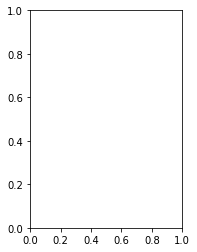

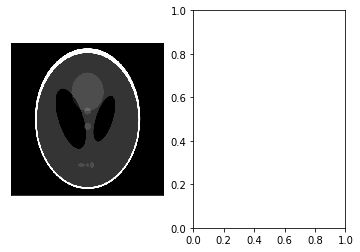

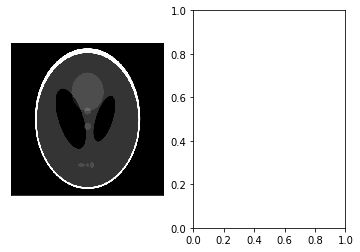

In [2]:
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
@interact(steps=(0,180,1))
def discrete_radon_transform(steps=20):
    # Plot the original and the radon transformed image
    plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray')
    plt.xticks([]), plt.yticks([])

    R = np.zeros((len(image), steps), dtype='float64')
    for s in range(steps):
        rotation = misc.imrotate(image, -s*180/steps).astype('float64')
        R[:,s] = sum(rotation)
    plt.subplot(1, 2, 2), plt.imshow(radon, cmap='gray')
    plt.show()

# Read image as 64bit float gray scale
image = misc.imread('TomografKomputerowy/res/photo.png', flatten=True).astype('float64')
radon = discrete_radon_transform(image, 220)



In [3]:
def calculatePosition(angle, radius, circle_middle = (0,0)):
    rad = angle / 180 * np.pi
    return ((int)(circle_middle[0] + radius*np.cos(rad)), (int)(circle_middle[1] + radius*np.sin(rad)))

In [4]:
a = 100
image = np.zeros((a,a))
@interact(angle=(0,360,1))
def drawCircle(angle=0):
    middle = (int)(a/2)
    drawCircle(angle, middle-1, (middle, middle))

def drawCircle(angle, radius, circle_middle):
    (x, y) = calculatePosition(angle, radius, circle_middle)
    from random import random
    image[x, y] = random() 
    plt.subplot(1, 1, 1), plt.imshow(image, cmap='gray')
    plt.show()


interactive(children=(IntSlider(value=0, description='angle', max=360), Output()), _dom_classes=('widget-interact',))

In [5]:
def bresenham(image, start, end):
    x1,y1 = start
    x2,y2 = end

    #pomijamy zal 1
    #if x2 < x1 and y2 > y1:

    #zal 2 - kat miedzy styczna a osia X < 45 stopni
    if x2 - x1 < y2 - y1:
        raise Exception("Alg bresenhama: niespełnione drugie założenie! x1:{x1} y1:{y1} x2:{x2} y2:{y2}".format(x1 = x1, x2=x2, y1=y1, y2=y2));

    dx = x2 - x1
    dy = y2 - y1
    e = dx / 2
    for i in range(0, dx):
        x1 = x1 + 1
        e = e - dy
        if e < 0:
            y1 = y1+1
            e = e + dx
        image[x1, y1] = 1

In [17]:
size = 200
radi = (int)(size/2)

@interact(angle=(0,360,5))
def drawLineAlongCircle(angle=270):
    x1,y1 = calculatePosition(angle, 50, (radi, radi))
    image2 = np.zeros((size, size))
    print(angle, radi)
    x2 = size - x1
    y2 = size - y1
    print(x1,y1,x2,y2)
    bresenham(image2, (x1,y1), (x2,y2))
    plt.subplot(1,1,1)
    plt.imshow(image2, cmap='gray')
    plt.show()

interactive(children=(IntSlider(value=270, description='angle', max=360, step=5), Output()), _dom_classes=('widget-interact',))